In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("penguins.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

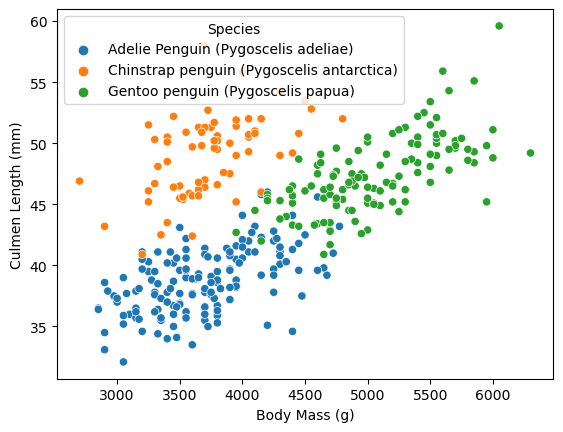

In [19]:
sns.scatterplot(data=df, x="Body Mass (g)", y="Culmen Length (mm)", hue="Species")

In [20]:
sortedMass = df.sort_values(by='Body Mass (g)', ascending=True)

In [21]:
sortedMass.reset_index(drop=True, inplace=True)

In [22]:
sortedMass.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,39,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N72A1,No,11/24/08,46.9,16.6,192.0,2700.0,FEMALE,9.80589,-24.73735,NaN
1,PAL0809,65,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N29A1,Yes,11/13/08,36.4,17.1,184.0,2850.0,FEMALE,8.62623,-26.11650,NaN
2,PAL0809,59,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N25A1,Yes,11/15/08,36.5,16.6,181.0,2850.0,FEMALE,9.07878,-25.88156,NaN
3,PAL0910,117,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N63A1,Yes,11/18/09,38.6,17.0,188.0,2900.0,FEMALE,9.18021,-25.77264,NaN
4,PAL0809,99,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N50A1,Yes,11/10/08,33.1,16.1,178.0,2900.0,FEMALE,9.04218,-26.15775,NaN


In [23]:
  def getNextBoundary(i, sortedDF):
    if i < (len(sortedDF)-1):
        first = sortedDF.iloc[i]["Body Mass (g)"]
        second = sortedDF.iloc[i+1]["Body Mass (g)"]
        return (first + second) / 2
    return (sortedDF.iloc[i-1]["Body Mass (g)"] + sortedDF.iloc[i]["Body Mass (g)"]/2)

In [25]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [35]:
def trainTree(df):
    trees = {}
    Adelie = [0, 0] 
    Chinstrap = [0, 0] 
    Gentoo = [0, 0] 
    treeNumber = 1
    trees[treeNumber] = [Adelie, Chinstrap, Gentoo]
    for i in range(len(df)):
        if df.iloc[i]["Body Mass (g)"] <= 3950:
            if df.iloc[i]["Species"] == 'Gentoo penguin (Pygoscelis papua)':
                trees[treeNumber][0][0] = trees[treeNumber][0][0] + 1
            else:
                trees[treeNumber][0][1] = trees[treeNumber][0][1] + 1
        else:
            boundary = getNextBoundary(i, df)
            if df.iloc[i]["Body Mass (g)"] <= boundary:
                if df.iloc[i]["Species"] == 'Chinstrap penguin (Pygoscelis antarctica)':
                    trees[treeNumber][1][0] = trees[treeNumber][1][0] + 1
                else:
                    trees[treeNumber][1][1] = trees[treeNumber][1][1] + 1
            else:
                if df.iloc[i]["Species"] == 'Adelie Penguin (Pygoscelis adeliae)':
                    trees[treeNumber][2][0] = trees[treeNumber][2][0] + 1
                else:
                    trees[treeNumber][2][1] = trees[treeNumber][2][1] + 1
    return trees

In [36]:
x = trainTree(df)
x

{1: [[1, 163], [0, 61], [41, 78]]}

In [37]:
def giniImpurityCalc(tree, key):
    denomSetosa = tree[key][0][0] + tree[key][0][1]
    leaf1 = 1 - (tree[key][0][0]/denomSetosa)**2 - (tree[key][0][1]/denomSetosa)**2
    denomVersi = tree[key][1][0] + tree[key][1][1]
    leaf2 = 1 - (tree[key][1][0]/denomVersi)**2 - (tree[key][1][1]/denomVersi)**2
    denomVirg = tree[key][2][0]+ tree[key][2][1]
    leaf3 = 1 - (tree[key][2][0]/denomVirg)**2 - (tree[key][2][1]/denomVirg)**2
    
    leaf1Obs = tree[key][0][0] + tree[key][0][1]
    leaf2Obs = tree[key][1][0] + tree[key][1][1]
    leaf3Obs = tree[key][2][0] + tree[key][2][1]
    totalObs = tree[key][0][0] + tree[key][0][1] + tree[key][1][0] + tree[key][1][1] + tree[key][2][0] + tree[key][2][1]
    
    giniScoree = leaf1 * (leaf1Obs/totalObs) + leaf2 * (leaf2Obs/totalObs) + leaf3 * (leaf3Obs/totalObs)
    return giniScoree

In [38]:
gi = giniImpurityCalc(x, 1)
gi

0.16202239545846694